<a href="https://colab.research.google.com/github/purnasai1499/purnasai_INFO5502_Spring2022/blob/main/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

#1)
path = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]")
print('{} categories are present'.format(len(path)))

#2)
for i in path:
  docs = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]/{}".format((i)))
  print('In file {} we have {} documents'.format(i,len(docs)))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
76 categories are present
In file 9 we have 744 documents
In file 74 we have 60 documents
In file 75 we have 473 documents
In file 77 we have 146 documents
In file 72 we have 74 documents
In file 78 we have 242 documents
In file 76 we have 177 documents
In file 8 we have 521 documents
In file 73 we have 705 documents
In file 71 we have 457 documents
In file 62 we have 218 documents
In file 64 we have 130 documents
In file 70 we have 192 documents
In file 65 we have 276 documents
In file 69 we have 700 document

In [ ]:
#3)
import pandas as pd
sum = 0
for i in path:
    #print(i)
    docs = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]/{}".format((i)))
    #print(docs)
    try:
        for file in docs:
            filepath = os.path.join("/content/gdrive/My Drive/preprocessed_cases[cases_29404]", i, file)
            data = pd.read_csv(filepath, sep="\t")
            sum += data.shape[0]
        #print(sum)
    except:
        print(i, file)
print("The average no of sentences in all categories is:", round(sum/78, 2))
print("The average no of sentences in all files is:", round(sum/29404, 2))

60 case0.txt
The average no of sentences in all categories is: 16772.68
The average no of sentences in all files is: 44.49


In [ ]:
#4)
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
sum = 0
for folder in path:
    docs = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in docs:
            filepath = os.path.join("/content/gdrive/My Drive/preprocessed_cases[cases_29404]", folder, file)
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].apply(lambda x: [item for item in x.split() if ((item not in stop) and (len(item)!= 1))])
                
                for sent in data[col]:
                    sum += len(sent)
        #print(sum)
    except Exception as e:
        print(e)
        #print(i, file)
print("The average no of words in all categories is:", round(sum/78, 2))
print("The average no of words in all files is:", round(sum/29404, 2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
No columns to parse from file
The average no of words in all categories is: 778977.42
The average no of words in all files is: 2066.39


In [ ]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=2fd657db0a4fea5191e445e32d7403286e1f3c8ca808aaffc2708b4e982f30e7
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
#5)
import re
import pandas as pd
from stop_words import get_stop_words
from nltk.corpus import stopwords
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# creating a set of stop words that are obtained from STOPWORDS and stop_words
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))
# we combien both sets of stopwords to make a corpus of stopwords
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]
print(len(stopwords))
import os

list_of_words = []
path = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]")
# we loop through each file and create a list of words
for folder in path:
    docs = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in docs:
            filepath = os.path.join("/content/gdrive/My Drive/preprocessed_cases[cases_29404]", folder, file)
            
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].str.lower()
                data[col] = data[col].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))
                data[col] = data[col].apply(lambda x: " ".join(item for item in x.split() if ((item not in stopwords) and (len(item)!= 1))))
                
                for sent in data[col]:
                    list_of_words.extend(sent.split())
       
    except Exception as e:
        print(e)

In [ ]:
from collections import Counter
# we get the top 50 unique terms and their count
(Counter(list_of_words).most_common(50))

[('court', 916156),
 ('district', 369314),
 ('state', 239772),
 ('also', 219433),
 ('evidence', 191498),
 ('whether', 188683),
 ('may', 181455),
 ('law', 170105),
 ('states', 159112),
 ('must', 157517),
 ('claim', 155554),
 ('case', 155090),
 ('federal', 153748),
 ('trial', 143615),
 ('united', 142208),
 ('claims', 139883),
 ('one', 135032),
 ('judgment', 131761),
 ('action', 128018),
 ('order', 125673),
 ('first', 120898),
 ('government', 119460),
 ('section', 114944),
 ('defendant', 112804),
 ('act', 112065),
 ('review', 109952),
 ('issue', 108070),
 ('two', 107793),
 ('motion', 106487),
 ('rule', 105719),
 ('decision', 104992),
 ('new', 104222),
 ('time', 101834),
 ('plaintiff', 100273),
 ('plaintiffs', 97792),
 ('filed', 93814),
 ('public', 93576),
 ('made', 92313),
 ('statute', 91667),
 ('jury', 90656),
 ('right', 89591),
 ('defendants', 86703),
 ('found', 86236),
 ('parties', 86014),
 ('held', 85557),
 ('supreme', 84868),
 ('use', 82996),
 ('within', 79353),
 ('based', 79117),
 (

In [ ]:
from collections import Counter
counter_list = (Counter(list_of_words).most_common(50))

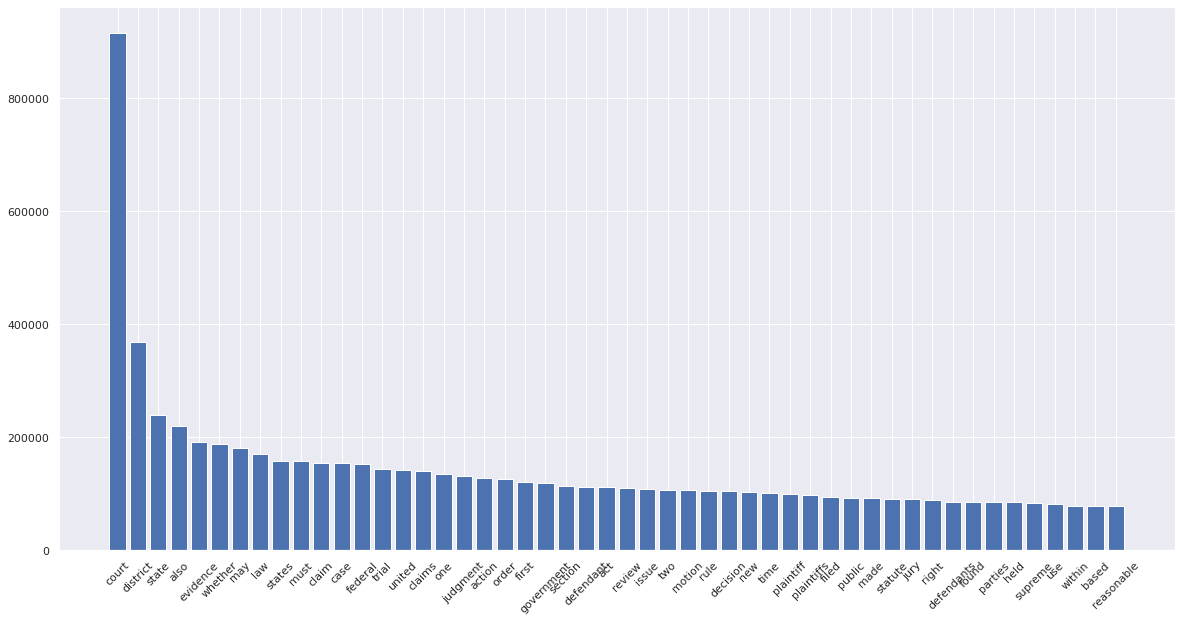

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.bar(dict(counter_list).keys(), dict(counter_list).values())
plt.xticks(rotation =45)
plt.show()
#dict(counter_list).keys()

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

In [ ]:
# Your answer here (code + explanation):
# 1.)
import pandas as pd
url = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv'
# reading data from git
df = pd.read_csv(url)
# we loop through each file and print the following details
for col in df.columns:
    print("Column:",col)
    print("The no of rows are:", df[col].shape[0])
    print("The no of unique values in this column are:", df[col].value_counts().shape[0])
    print(df[col].value_counts())
    print()

Column: ge
The no of rows are: 131
The no of unique values in this column are: 2
M    72
F    59
Name: ge, dtype: int64

Column: cst
The no of rows are: 131
The no of unique values in this column are: 5
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64

Column: tnp
The no of rows are: 131
The no of unique values in this column are: 4
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64

Column: twp
The no of rows are: 131
The no of unique values in this column are: 4
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64

Column: iap
The no of rows are: 131
The no of unique values in this column are: 4
Vg      63
Good    53
Best     8
Pass     7
Name: iap, dtype: int64

Column: esp
The no of rows are: 131
The no of unique values in this column are: 4
Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64

Column: arr
The no of rows are: 131
The no of unique values in this column are: 2
N    78
Y    53
Name: arr, dtyp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


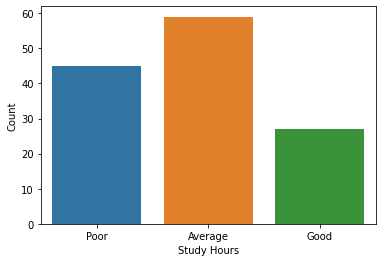

In [ ]:
# 2.)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df['sh'])
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


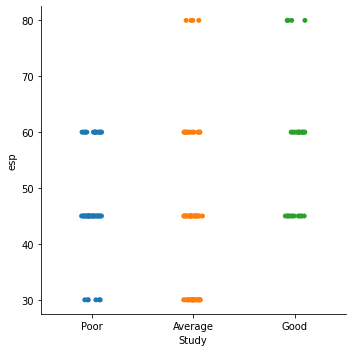

In [ ]:
# 3.)
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df1 = pd.DataFrame()
df1['Study']=pd.DataFrame(df.sh)
df1['esp']=pd.DataFrame(df.esp)
df1['esp'].mask(df1['esp'] == 'Best', 80, inplace=True)
df1['esp'].mask(df1['esp'] == 'Vg', 60, inplace=True)
df1['esp'].mask(df1['esp'] == 'Good', 45, inplace=True)
df1['esp'].mask(df1['esp'] == 'Pass', 30, inplace=True)
df1['esp'].mask(df1['esp'] == 'Fail', 30, inplace=True)
df1['exampercent']=pd.DataFrame(df.esp)
sns.factorplot(x='Study',y='esp', kind = 'strip',data=df1)
plt.show()

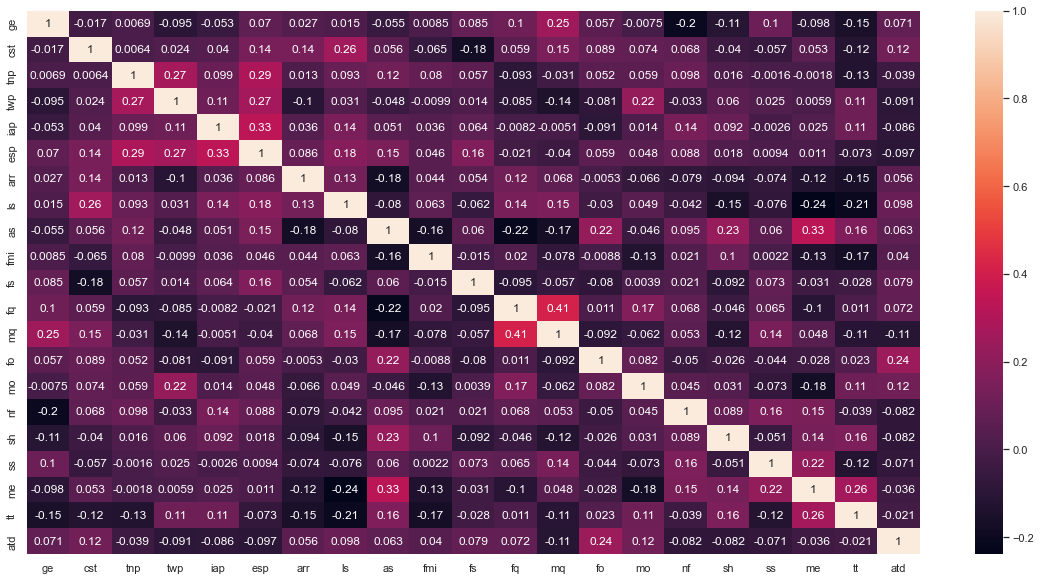

In [ ]:
# 4.)
# Import label encoder 
from sklearn import preprocessing
import seaborn as sns
label_encoder = preprocessing.LabelEncoder()  
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = preprocessing.LabelEncoder()
    # we convert categorical columns data into numerical data
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

df1 = Encoder(df)
# we drop the ms column
df1 = df1.drop('ms', axis = 1)

# we get the correlation data
corr = df1.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr,annot=True)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
I had chosen a Latest Covid-19 India Status.csv datset.
I want to answer the following questions from the dataset.

Q1.) Are there any null values in the dataset?

Q2.) Finding the number of active cases using count plot?

Q3.)Vizualising total cases according to the states?


'''

'\nI chose the following dataset.\n. Any Null Values\n\n. Which day in a month having least no of bike share?\n\n. Which season in a year is having less no of bike shares?\n\n\n\n'

In [ ]:
# You code to answer the three questions (Please add comments in the code):
# Q1.)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

covid=pd.read_csv('C:\\Users\\personal\\Downloads\\Latest Covid-19 India Status.csv')
# counting null values in each column
covid.isnull().sum()


State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

It can be observed that there are no null values in the dataset.

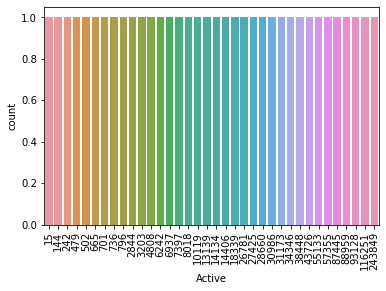

In [ ]:
# Q2.)
sns.countplot(covid['Active'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Using count plot we found the count of active covid cases in india.

<AxesSubplot:xlabel='Total Cases', ylabel='State/UTs'>

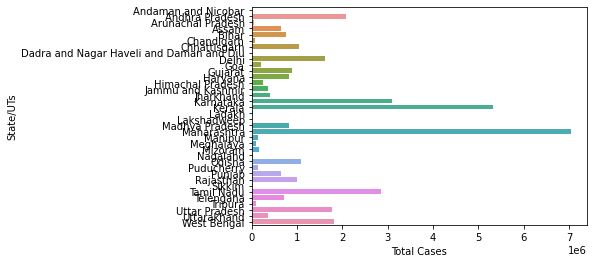

In [ ]:
# Q3)
sns.barplot(y='State/UTs',x='Total Cases',data=covid)

In [ ]:
#It is observed that maharastra is having more number of cases